In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt



### Classification tasks using SVMs

A Support Vector Machine (SVM) is a supervised machine learning algorithm that can be applied to both linear and nonlinear classification tasks. SVMs are effective in their ability to find clear separation between classes using high-dimensional data. SVMs are used in classification, regression, and anomaly detection tasks.

#### Support Vectors 
Support vectors are the data points closest to the decision boundary (hyperplane) that separate different classes. These points have the smallest margin to the decision boundary and play a crucial role in defining the hyperplane.

#### Margin 

For SVMs, the margin refers to the distance between the decision boundary (hyperplane) and the nearest data points (support vectors) from each class. The margin is a critical concept in SVMs as it reflects the separation between classes, and SVMs are designed to find the hyperplane that maximizes this margin because it leads to better generalization and robustness.

#### C Parameter

C is a regularization hyperparameter that controls the trade-off between maximizing the margin and minimizing the classification error. A smaller C value results in a larger margin, but may allow some misclassified points. A larger C value reduces the margin, but minimizes classification errors.

#### Kernel

<b>Linear Kernel (kernel='linear')</b>: This is the simplest kernel and is used for linearly separable data. It creates a linear decision boundary.

<b>Polynomial Kernel (kernel='poly')</b>: This kernel is used to handle nonlinear data. It introduces higher-dimensional feature mappings to capture complex patterns. You can specify the polynomial degree using the degree parameter.

<b>Radial Basis Function (RBF) Kernel (kernel='rbf')</b>: RBF or Gaussian kernel models nonlinear relationships and can capture complex decision boundaries. The gamma parameter controls the shape of the kernel.

<b>Sigmoid Kernel (kernel='sigmoid')</b>: Sigmoid kernel is suitable for data that doesn't have a clear separation boundary. It's often used in binary classification problems.


#### Gamma 

<b>Small Gamma (gamma is small)</b>: A smaller gamma value makes the kernel function smoother and results in a broader decision boundary. This can lead to a model with high bias and low variance. It means the model is less sensitive to individual data points, and the decision boundary can be more linear.

<b>Large Gamma (gamma is large)</b>: A larger gamma value makes the kernel function more peaked and results in a narrower decision boundary. This can lead to a model with low bias and high variance. It means the model can fit the training data very closely and may lead to overfitting.



#### Linear SVM

Accuracy: 90.00%
Precision: 90.14%
Recall: 90.00%
F1-Score (weighted): 89.92%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



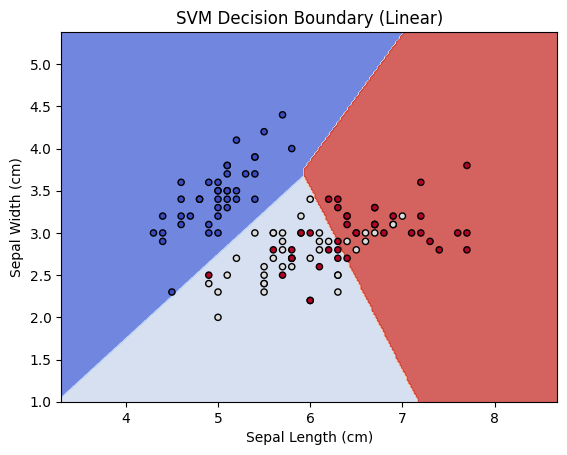

In [2]:
# Load a sample dataset (Iris dataset in this example)
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score (weighted): {f1 * 100:.2f}%")

# Classification Report
report = classification_report(y_test, y_pred)
print(report)

# Define a function to plot the decision boundary
def plot_decision_boundary(X, y, classifier):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title('SVM Decision Boundary (Linear)')
    plt.show()

plot_decision_boundary(X_train, y_train, svm_classifier)

#### Gaussian SVM

Accuracy: 90.00%
Precision: 90.14%
Recall: 90.00%
F1-Score (weighted): 89.92%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



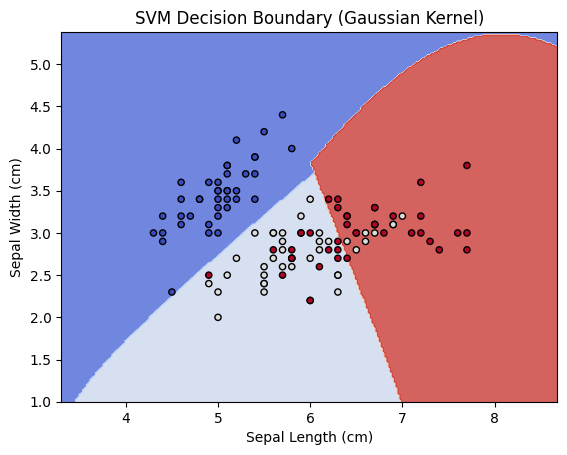

In [3]:
# Load a sample dataset (Iris dataset in this example)
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier with Gaussian (RBF) kernel
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score (weighted): {f1 * 100:.2f}%")

# Classification Report
report = classification_report(y_test, y_pred)
print(report)

def plot_decision_boundary(X, y, classifier):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title('SVM Decision Boundary (Gaussian Kernel)')
    plt.show()

plot_decision_boundary(X_train, y_train, svm_classifier)

#### Polynomial SVM

Accuracy: 93.33%
Precision: 93.53%
Recall: 93.33%
F1-Score: 93.10%
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        30
           1       0.96      0.90      0.93        30

    accuracy                           0.93        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60



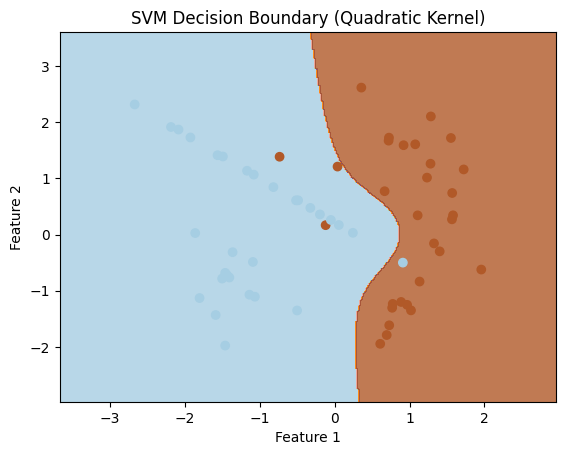

In [4]:
# Generate synthetic data for multiclass classification
X, y = datasets.make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier with a quadratic kernel
svm_classifier = SVC(kernel='poly', degree=3, C=1.0)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1 * 100:.2f}%")

# Classification Report
report = classification_report(y_test, y_pred)
print(report)

# Plot the decision boundary
def plot_decision_boundary(X, y, classifier):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary (Quadratic Kernel)')
    plt.show()

# Plot the decision boundary of the trained SVM
plot_decision_boundary(X_test, y_test, svm_classifier)

#### Sigmoidal SVM

{'C': 0.1, 'coef0': 0.1}
Accuracy: 83.30%
Precision: 83.30%
Recall: 83.30%
F1-Score: 83.22%
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      2003
           1       0.84      0.83      0.83      1997

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.83      0.83      0.83      4000



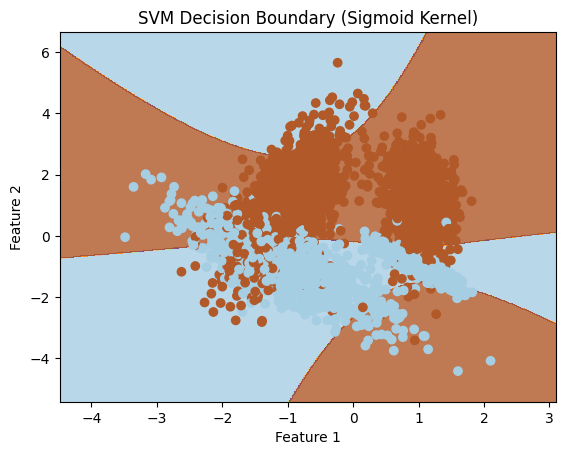

In [5]:
# Generate synthetic data for binary classification
X, y = datasets.make_classification(n_samples=20000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.1, 1, 5, 10],
    'coef0': [0.1, 0.3, 0.5, 0.7, 1]
}

# Create an SVM classifier with the sigmoid kernel
base_svm_classifier = SVC(kernel='sigmoid', gamma="scale")

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(base_svm_classifier, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)

# Create a new SVM classifier with the best hyperparameters
svm_classifier = SVC(kernel='sigmoid', C=best_params['C'], gamma="scale", coef0=best_params['coef0'])

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate precision and recall
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1 * 100:.2f}%")

# Classification Report
report = classification_report(y_test, y_pred)
print(report)


# Plot the decision boundary
def plot_decision_boundary(X, y, classifier):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary (Sigmoid Kernel)')
    plt.show()

# Plot the decision boundary of the trained SVM
plot_decision_boundary(X_test, y_test, svm_classifier)